In [1]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

/home/h6x/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/h6x/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

In [3]:
model = resnet18(pretrained=True).eval()
# Get your input

/home/h6x/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/h6x/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
img = read_image("/home/h6x/git_projects/ornl-overdose-modeling-per-images/GradCam_experiment_1/ScoreCAM/sample/tigercat.jpg")

In [5]:
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [6]:
with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

In [9]:
activation_map[0]

tensor([[[0.0956, 0.1751, 0.2331, 0.2308, 0.2273, 0.2484, 0.2085],
         [0.1166, 0.2344, 0.3188, 0.3952, 0.4443, 0.5064, 0.3614],
         [0.0958, 0.2193, 0.3513, 0.5167, 0.6353, 0.7945, 0.4748],
         [0.0364, 0.1504, 0.3517, 0.6912, 0.8018, 1.0000, 0.5717],
         [0.0000, 0.0602, 0.2215, 0.5735, 0.7211, 0.9017, 0.5560],
         [0.0136, 0.0665, 0.1719, 0.4409, 0.5757, 0.6505, 0.4104],
         [0.0044, 0.0229, 0.0568, 0.1688, 0.2526, 0.2594, 0.1643]]])

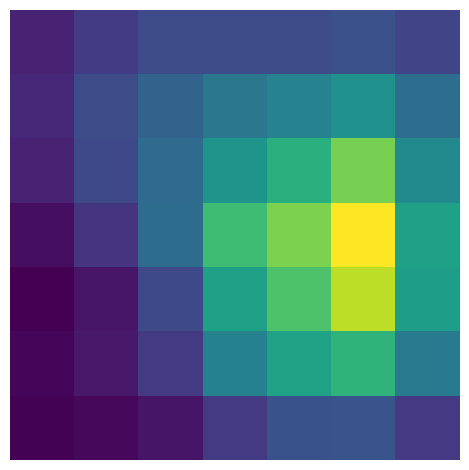

In [7]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

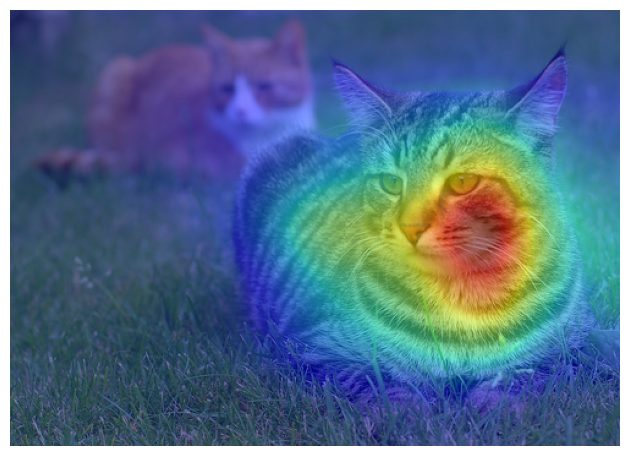

In [8]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()